# Prediction Using Unsupervised ML

# Author - Chandrika Ghosh 

##### Prediction of the optimum number of clusters.

#### data-https://bit.ly/3kXTdox 

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [25]:
# Reading the dataset

df = pd.read_csv("C:/Users/ghosh/Desktop/Python/Datasets/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

#### Exploring the dataset

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
df.shape

(150, 6)

In [29]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
#dropping ID and species columns because it is a unsupervised model
iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['Id', 'Species'])
print(iris_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [32]:
#taking the first 10 datas
iris_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Finding the optimum number of clusters using The Elbow Method.

In [33]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    

C:\Users\ghosh\Documents\R\New folder (2)\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


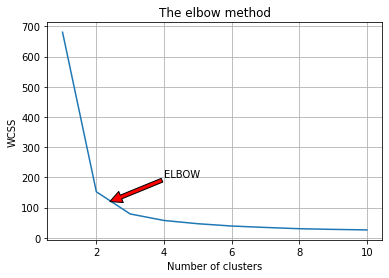

In [34]:
#Plotting the results onto a line graph. 
#allowing us to observe 'The Elbow'.
plt.plot(range(1, 11), wcss)

plt.title('The elbow method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS') #WCSS-Within cluster sum of squares

plt.annotate("ELBOW", xytext = (4, 200), xy = (2.4, 120), arrowprops = {"facecolor":"red"})

plt.grid()

plt.show()

From the above figure we can see that, after point 3 (approx) WCSS is constant i.e it is not decreasing with increasing no. of clusters. Thus we can say that the no. of clusters is 3.

#### Creating the kmeans classifier. 

In [35]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

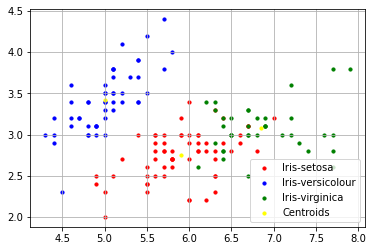

In [36]:
# Visualising the clusters - On the first two columns in the form of scatter plot
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 10, c = 'yellow', label = 'Centroids')

plt.grid()

plt.legend()

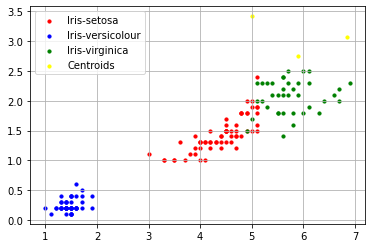

In [37]:
#Visualising the clusters - On the 3rd and 4th columns in the form of scatter plot
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 10, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 10, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 10, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 10, c = 'yellow', label = 'Centroids')

plt.grid()

plt.legend()